# Simulated CO<sub>2</sub> distributions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

import figure_panels
import models
import obs_surface
import util

## Load data from [CarbonTracker (CT2019B)](http://dx.doi.org/10.25925/20201008)

Use the `models` interface to compute zonal-means and surface molefractions.

In [3]:
model_list = ['CT2019B',]
model_obj = {model: models.Model(model) for model in model_list}
model_obj

{'CT2019B': <models.core.Model at 0x2b3b22abc790>}

assuming cache is correct
reading cached file: /glade/work/mclong/so-co2-airborne-obs/cache-model-calcs/CT2019B/molefractions_surface_daily.zarr
assuming cache is correct
reading cached file: /glade/u/home/mclong/codes/so-co2-airborne-obs/so-co2-airborne-obs/models/data-cache/CT2019B/spo_ts_daily.nc


CPU times: user 2.94 s, sys: 353 ms, total: 3.29 s
Wall time: 14.1 s


{'CT2019B': <xarray.Dataset>
 Dimensions:  (season: 4, lat: 30, lon: 120)
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 ... -37.0 -35.0 -33.0 -31.0
   * lon      (lon) float64 -178.5 -175.5 -172.5 -169.5 ... 172.5 175.5 178.5
   * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
 Data variables:
     CO2      (season, lat, lon) float32 -0.00335 -0.003348 ... 0.006025
     CO2_FFF  (season, lat, lon) float32 -0.0009013 -0.0009003 ... 0.2733 0.2737
     CO2_LND  (season, lat, lon) float32 0.0009545 0.0009534 ... -0.1693 -0.1649
     CO2_OCN  (season, lat, lon) float32 -0.003329 -0.003328 ... -0.1071 -0.1047
     PS       (season, lat, lon) float32 6.643e+04 6.649e+04 ... 1.014e+05
     T        (season, lat, lon) float32 244.1 244.2 244.2 ... 290.1 290.2 290.2
     area     (season, lat, lon) float64 5.179e+09 5.179e+09 ... 2.544e+11
     theta    (season, lat, lon) float32 274.4 274.4 274.4 ... 288.9 289.0 289.0}

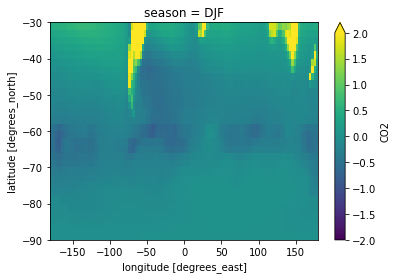

In [4]:
%%time
dset_srf = {
    model: model_obj[model].open_derived_dataset('molefractions_surface_daily')
    for model in model_list
}
ds_spo = {
    model: model_obj[model].open_derived_dataset('spo_ts_daily')
    for model in model_list
}

for model in model_list:
    for v in ['CO2', 'CO2_OCN', 'CO2_LND', 'CO2_FFF']:
        dset_srf[model][v] = dset_srf[model][v] - ds_spo[model][v]

    dset_srf[model] = dset_srf[model].groupby('time.season').mean('time').compute()

dset_srf[model_list[0]].CO2.sel(season='DJF').plot(vmin=-2, vmax=2)
dset_srf

In [5]:
dsets_theta_bins = {}
for model in model_list:
    ds = model_obj[model].open_derived_dataset(
        'molefractions_theta_bins',
        kwargs_name='SO-10K-bins-300K_275K',
        lat_bounds=(-80., -45.),
        theta_bins=[(295., 305.), (270., 280.),],
    )
    dsets_theta_bins[model] = ds.sel(time=slice('2009', '2020')).compute()
dsets_theta_bins   

assuming cache is correct
reading cached file: /glade/u/home/mclong/codes/so-co2-airborne-obs/so-co2-airborne-obs/models/data-cache/CT2019B/molefractions_theta_bins.SO-10K-bins-300K_275K.nc


{'CT2019B': <xarray.Dataset>
 Dimensions:            (time: 3652, theta_bins: 2, d2: 2)
 Coordinates:
   * time               (time) datetime64[ns] 2009-01-01T12:00:00 ... 2018-12-...
   * theta_bins         (theta_bins) float64 300.0 275.0
     theta_bins_bounds  (theta_bins, d2) float64 295.0 305.0 270.0 280.0
 Dimensions without coordinates: d2
 Data variables:
     CO2                (time, theta_bins) float32 383.7 383.5 ... 406.2 405.9
     Z3                 (time, theta_bins) float32 4.937e+03 669.0 ... 807.7
     P                  (time, theta_bins) float32 5.344e+04 ... 8.992e+04
     T                  (time, theta_bins) float32 249.3 268.7 ... 245.7 267.5
     theta              (time, theta_bins) float32 299.8 275.8 ... 299.8 276.2
     CO2_OCN            (time, theta_bins) float32 -10.24 -10.45 ... -26.17
     CO2_LND            (time, theta_bins) float32 -5.733 -5.565 ... -12.81
     CO2_FFF            (time, theta_bins) float32 31.47 31.31 ... 76.79 76.64
     area    

assuming cache is correct
reading cached file: /glade/work/mclong/so-co2-airborne-obs/cache-model-calcs/CT2019B/molefractions_z_za.zarr


/glade/work/mclong/miniconda3/envs/so-co2/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 1.64 s, sys: 168 ms, total: 1.81 s
Wall time: 5.74 s


{'CT2019B': <xarray.Dataset>
 Dimensions:     (season: 4, zlev: 25, lat: 30)
 Coordinates:
   * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... -35.0 -33.0 -31.0
   * zlev        (zlev) float64 1.12e+04 1.04e+04 9.6e+03 ... 200.0 150.0 100.0
     theta_bins  float64 300.0
   * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
 Data variables:
     CO2         (season, zlev, lat) float64 -0.6654 -0.6578 ... -0.005663
     CO2_FFF     (season, zlev, lat) float64 -3.022 -3.003 ... 0.06542 0.09073
     CO2_LND     (season, zlev, lat) float64 0.6113 0.6067 ... 0.0737 0.119
     CO2_OCN     (season, zlev, lat) float64 1.762 1.755 ... -0.2422 -0.2157
     P           (season, zlev, lat) float64 1.991e+04 1.992e+04 ... 1.008e+05
     T           (season, zlev, lat) float64 224.3 224.3 224.3 ... 288.1 289.2
     Z3          (season, zlev, lat) float64 1.122e+04 1.122e+04 ... 101.8 101.9
     area        (season, lat) float64 5.179e+09 1.553e+10 ... 2.544e+11
     theta       (season, zl

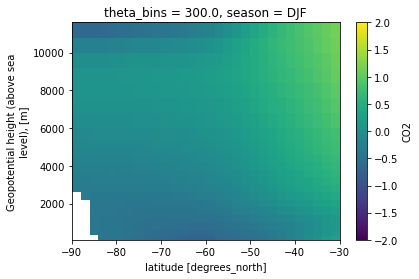

In [6]:
%%time
dset_za = {
    model: model_obj[model].open_derived_dataset('molefractions_z_za')
    for model in model_list
}

for model in model_list:
    for v in ['CO2', 'CO2_OCN', 'CO2_LND', 'CO2_FFF']:
        dset_za[model][v] = dset_za[model][v] - dsets_theta_bins[model][v].sel(theta_bins=300.) #ds_spo[model][v]

    dset_za[model] = dset_za[model].groupby('time.season').mean('time').compute()

dset_za[model_list[0]].CO2.sel(season='DJF').plot(vmin=-2, vmax=2)
dset_za

## Zonal mean CO<sub>2</sub> distributions

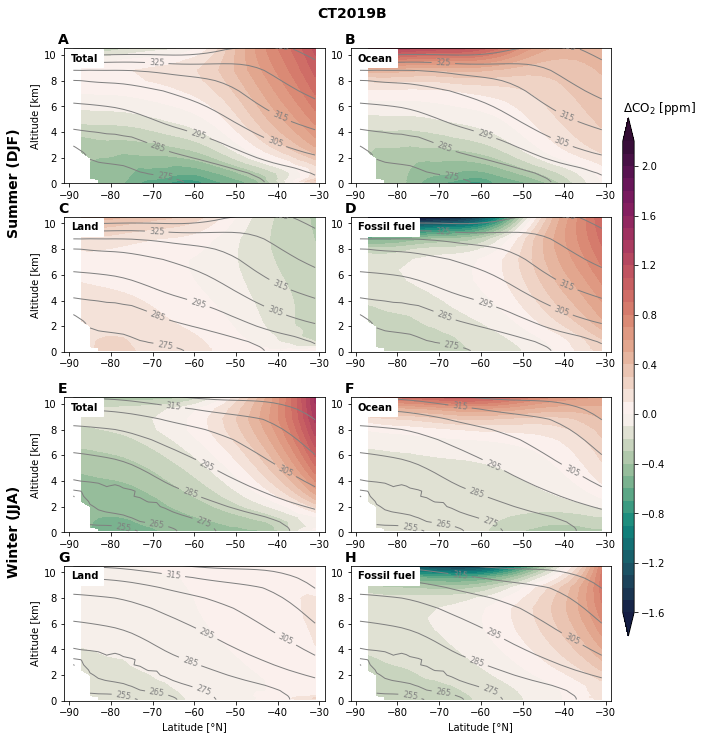

In [7]:
tracer_name = dict(
    CO2='Total',
    CO2_OCN='Ocean',
    CO2_LND='Land',
    CO2_FFF='Fossil fuel',
)

def section_panel(model_list):
    fig = plt.figure(figsize=(8, 12)) #dpi=300)

    gs_outer = gridspec.GridSpec(
        nrows=2, ncols=1,
        left=0, right=0.95,
        wspace=0.075, hspace=0.15,
    )

    ax_row = []
    ax_col = []
    ax_list = []
    for j, model in enumerate(model_list):
        for i, season in enumerate(['DJF', 'JJA']):        
            gs_inner = gs_outer[i, j].subgridspec(
                nrows=2, ncols=2, 
                hspace=0.25, wspace=0.1
            )    
            axs = np.array([
                plt.subplot(gs_inner[0, 0]), plt.subplot(gs_inner[0, 1]),
                plt.subplot(gs_inner[1, 0]), plt.subplot(gs_inner[1, 1]),
            ])
            ds_xs = dset_za[model].sel(season=season)
            lat = ds_xs.lat
            zlev = ds_xs.zlev * 1e-3
            theta = ds_xs.theta

            for n, v in enumerate(['CO2', 'CO2_OCN', 'CO2_LND', 'CO2_FFF']):
                title = f'{model} {season} {v}'
                cf = figure_panels.model_CO2_xsection(lat, zlev, ds_xs[v].values, theta.values, axs[n])

                axs[n].text(-89.5, 9.5, tracer_name[v], fontweight='bold', backgroundcolor='w', zorder=100)
                if not (i == 1 and n >= 2):
                    axs[n].set_xlabel('')

                if not (j == 0 and (n == 0 or n == 2)):
                    axs[n].set_ylabel('')

                if j == 0 and n == 0:
                    ax_row.append(axs[n])
                if i == 0 and n == 0:
                    ax_col.append(axs[n])
                ax_list.append(axs[n])    

    cax = fig.add_axes([0.97, 0.2, 0.02, 0.6])                
    cb = plt.colorbar(cf, cax=cax)
    cb.ax.set_title('$\Delta$CO$_2$ [ppm]', loc='left');

    util.subplot_row_labels(ax_row, ['Summer (DJF)', 'Winter (JJA)'], yoff=-1)
    util.label_plots(fig, ax_list, xoff=-0.01, yoff=0.005)
    plt.suptitle(model_list[0], y=0.92, 
                 fontsize='14', fontweight='bold', ha='center', va='center'
                )
    
    util.savefig(f'zonal-mean-sections-{model_list[0]}')
    
for m in model_list:
    section_panel([m])    


## Surface CO<sub>2</sub> distributions

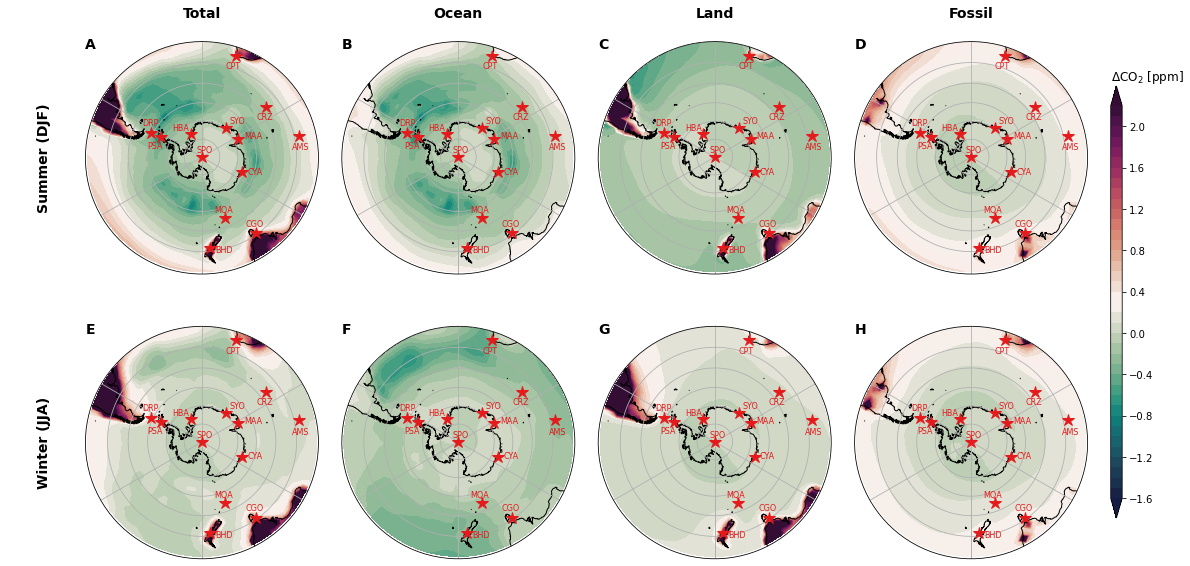

In [8]:
fig = plt.figure(figsize=(16, 10)) #dpi=300)
gs = gridspec.GridSpec(
    nrows=2, ncols=4, 
    left=0.1, right=0.97,
    hspace=0.1, wspace=0.1)    

prj = ccrs.SouthPolarStereo()

stninfo = obs_surface.get_stn_info('CO2')
stninfo = stninfo.loc[stninfo.stn.isin([s for s in stninfo.stn if 'LMG' not in s])]

axs = np.array(
    [plt.subplot(gs[i, j], projection=prj) 
     for i, j in product(range(2), range(4))]
).reshape((2, 4))

util.label_plots(fig, [ax for ax in axs.ravel()], xoff=0., yoff=-0.01)


model = 'CT2019B'
for i, season in enumerate(['DJF', 'JJA']):
    for j, flavor in enumerate(['CO2', 'CO2_OCN', 'CO2_LND', 'CO2_FFF']):
        ds_map = dset_srf[model].sel(season=season)    
        lon = ds_map.lon
        lat = ds_map.lat
        field = ds_map[flavor]
        cf = figure_panels.model_CO2_map(lon, lat, field, axs[i, j], stninfo=stninfo)
        
cax = fig.add_axes([0.99, 0.2, 0.01, 0.6])                
cb = plt.colorbar(cf, cax=cax)
cb.ax.set_title('$\Delta$CO$_2$ [ppm]', loc='left');

util.subplot_row_labels(axs[:, 0], ['Summer (DJF)', 'Winter (JJA)'], xoff=60)
util.subplot_col_labels(axs[0, :], ['Total', 'Ocean', 'Land', 'Fossil'])
util.savefig('surface-co2-maps')